Part1: Big Data Processing


Task 1: Data Cleaning and Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [2]:
df=pd.read_csv("../NVDA.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022/7/1,14.899,15.063000,14.392,14.523,14.506663,577610000.0
1,2022/7/5,14.175,14.971000,14.055,14.964,14.947166,651397000.0
2,2022/7/6,15.010,15.319000,14.789,15.130,15.112980,529066000.0
3,2022/7/7,15.456,15.945000,15.389,15.858,15.840160,492903000.0
4,2022/7/8,15.430,16.037001,15.389,15.838,15.820185,467972000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       522 non-null    object 
 1   Open       521 non-null    float64
 2   High       522 non-null    float64
 3   Low        523 non-null    float64
 4   Close      522 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     521 non-null    float64
dtypes: float64(6), object(1)
memory usage: 28.7+ KB


In [5]:
df.isnull().sum()

Date         1
Open         2
High         1
Low          0
Close        1
Adj Close    0
Volume       2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Convert the 'Date' column to datetime format, accounting for the use of slashes
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')


In [9]:

# Optionally change the format to another for display purposes
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')


In [10]:

# Print the transformed data
df['Date'].head()


0    01-07-2022
1    05-07-2022
2    06-07-2022
3    07-07-2022
4    08-07-2022
Name: Date, dtype: object

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,46.601402,47.446458,45.700197,46.624110,46.613731,4.831818e+08
std,32.703247,33.282645,31.934308,32.602529,32.605493,1.574152e+08
min,10.971000,11.735000,10.813000,11.227000,11.217702,1.679340e+08
25%,18.160000,18.718000,17.875999,18.334999,18.314371,3.833870e+08
50%,42.252998,42.897999,41.648998,42.301998,42.289337,4.573280e+08
75%,57.988998,59.500000,57.224998,59.491001,59.483326,5.510110e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09


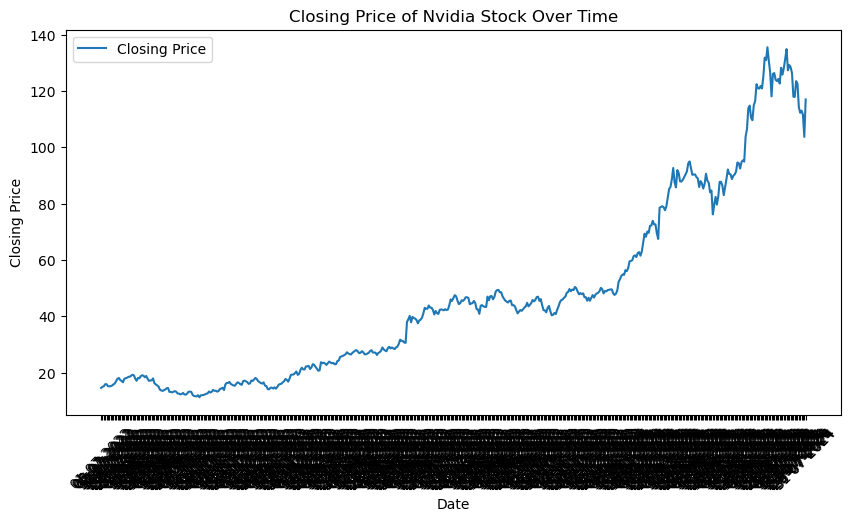

In [12]:
# Plot the closing price over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Closing Price of Nvidia Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Task 2 Feature Engineering

In [13]:
# Calculate daily returns as the percentage change in adjusted close price
df['Daily_Returns'] = df['Adj Close'].pct_change() * 100


# Set the daily return for the first day to 0 since there's no previous day to compare
# df[''].iloc[0] = 0

df.loc[0, "Daily_Returns"] = 0

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,01-07-2022,14.899,15.063000,14.392,14.523,14.506663,577610000.0,0.000000
1,05-07-2022,14.175,14.971000,14.055,14.964,14.947166,651397000.0,3.036556
2,06-07-2022,15.010,15.319000,14.789,15.130,15.112980,529066000.0,1.109334
3,07-07-2022,15.456,15.945000,15.389,15.858,15.840160,492903000.0,4.811626
4,08-07-2022,15.430,16.037001,15.389,15.838,15.820185,467972000.0,-0.126104


In [15]:

# Print the top 10 dates with the highest daily return
print(df.nlargest(10, 'Daily_Returns')[['Date', 'Daily_Returns']])


           Date  Daily_Returns
226  25-05-2023      24.369631
412  22-02-2024      16.400871
92   10-11-2022      14.329265
162  23-02-2023      14.021388
522  31-07-2024      12.812102
476  23-05-2024       9.319651
285  21-08-2023       8.471334
105  30-11-2022       8.237931
17   27-07-2022       7.603019
140  23-01-2023       7.590124


In [16]:
# Calculate the 7-day moving average of the closing price
df['7_Day_MA'] = df['Close'].rolling(window=7).mean()

In [17]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,7_Day_MA
518,25-07-2024,113.040001,116.629997,106.300003,112.279999,112.279999,460067000.0,-1.724290,119.277142
519,26-07-2024,116.190002,116.199997,111.580002,113.059998,113.059998,293399100.0,0.694691,117.377142
520,29-07-2024,113.690002,116.279999,111.300003,111.589996,111.589996,248152100.0,-1.300196,116.462856
521,30-07-2024,111.519997,111.989998,102.540001,103.730003,103.730003,486833300.0,-7.043636,114.434285
522,31-07-2024,112.900002,118.339996,110.879997,117.019997,117.019997,473174200.0,12.812102,113.502856


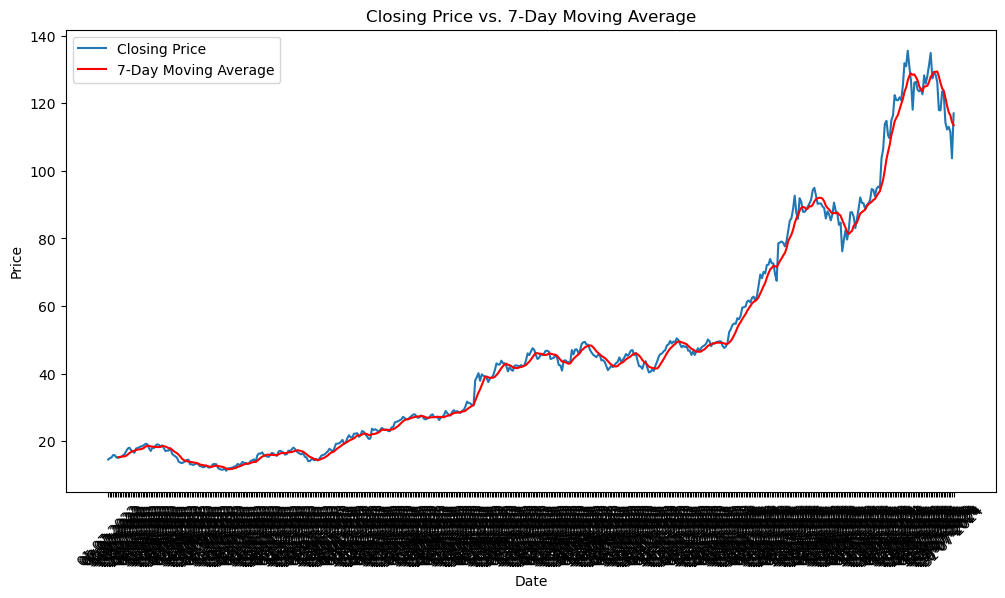

In [18]:
# Plot the closing price and the 7-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['7_Day_MA'], label='7-Day Moving Average', color='red')
plt.title('Closing Price vs. 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the trading volume
df['Normalized_Volume'] = scaler.fit_transform(df[['Volume']])

# Print the top 10 dates with the highest normalized trading volume
print(df.nlargest(10, 'Normalized_Volume')[['Date', 'Normalized_Volume']])


           Date  Normalized_Volume
226  25-05-2023           1.000000
43   01-09-2022           0.734701
288  24-08-2023           0.718115
423  08-03-2024           0.708104
162  23-02-2023           0.690463
229  31-05-2023           0.606584
25   08-08-2022           0.591525
264  21-07-2023           0.578378
289  25-08-2023           0.550450
228  30-05-2023           0.549040


Task 3: Data Visualization

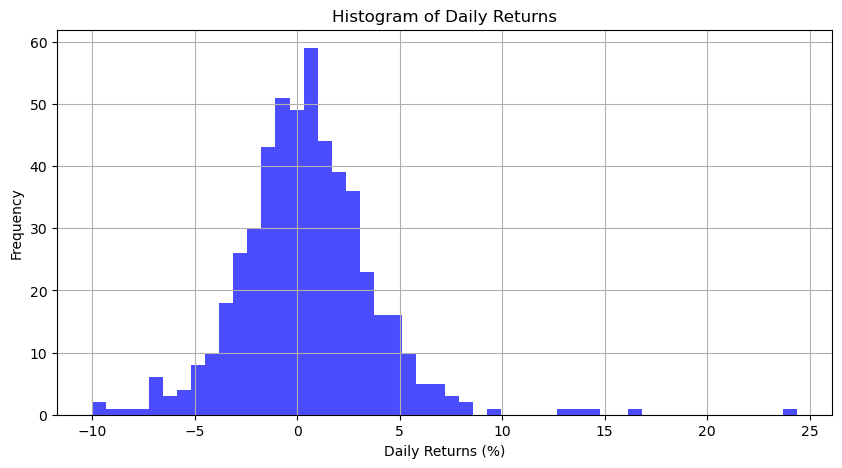

In [20]:
# Create a histogram for daily returns
plt.figure(figsize=(10, 5))
plt.hist(df['Daily_Returns'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


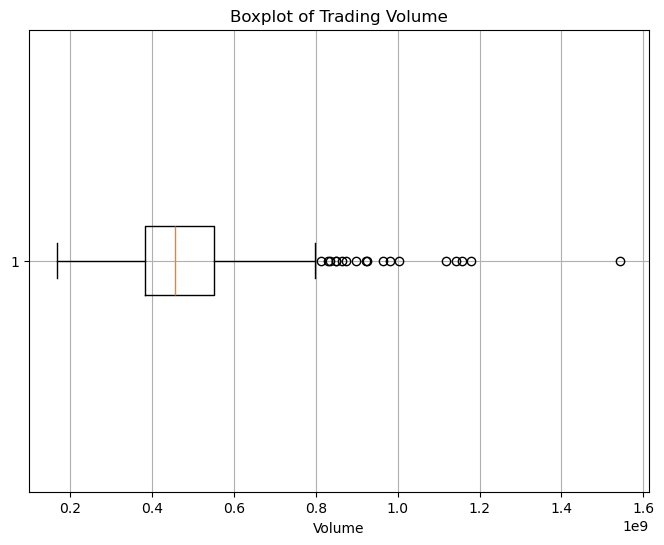

In [21]:
# Generate a boxplot for the trading volume
plt.figure(figsize=(8, 6))
plt.boxplot(df['Volume'], vert=False)
plt.title('Boxplot of Trading Volume')
plt.xlabel('Volume')
plt.grid(True)
plt.show()


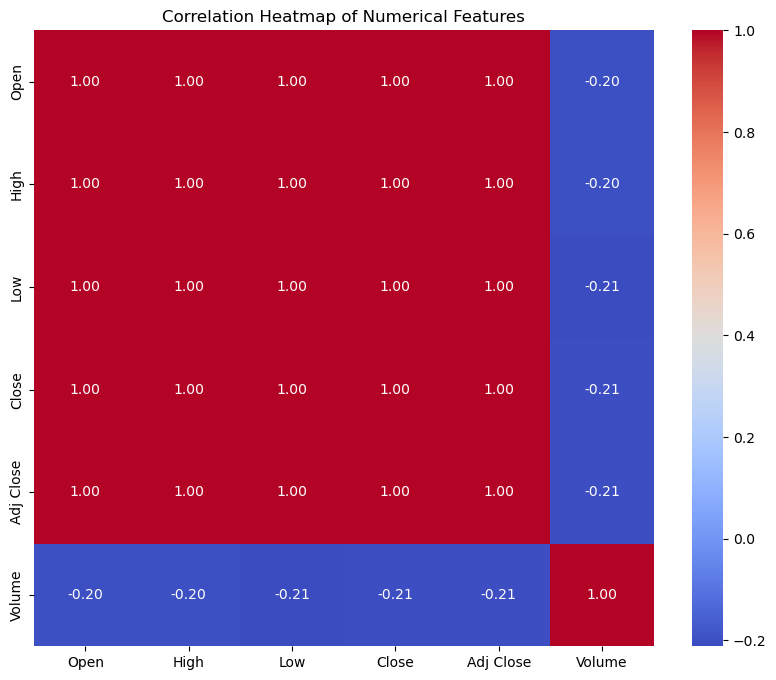

In [22]:
# Calculate the correlation matrix excluding the newly added columns
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Part 2: Machine Learning



Task 1: Clustering with KMeans

In [23]:
# Select features for clustering
features = df[['Daily_Returns', 'Normalized_Volume', 'Adj Close']]


c:\Users\domma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\domma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\domma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\domma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

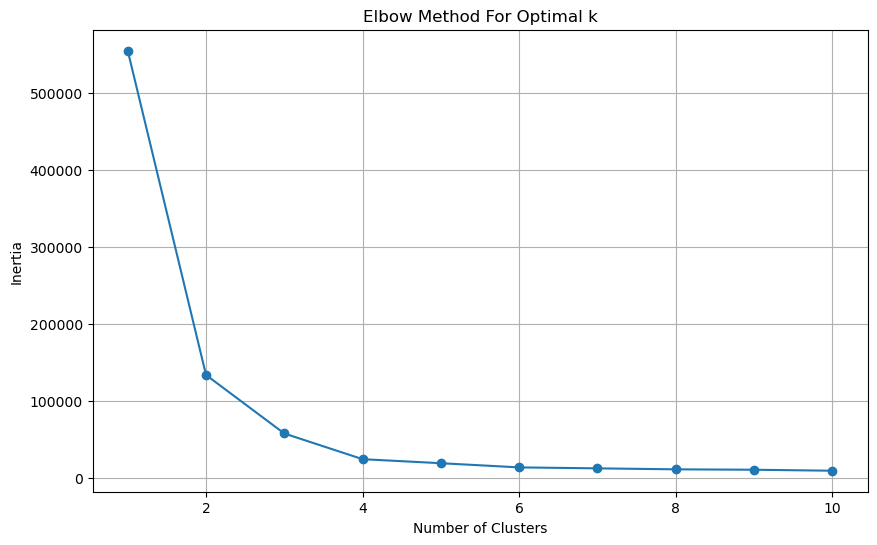

In [24]:
# Calculate the inertia for a range of k values
inertia = []
k_values = range(1, 11)  # Testing 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


c:\Users\domma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


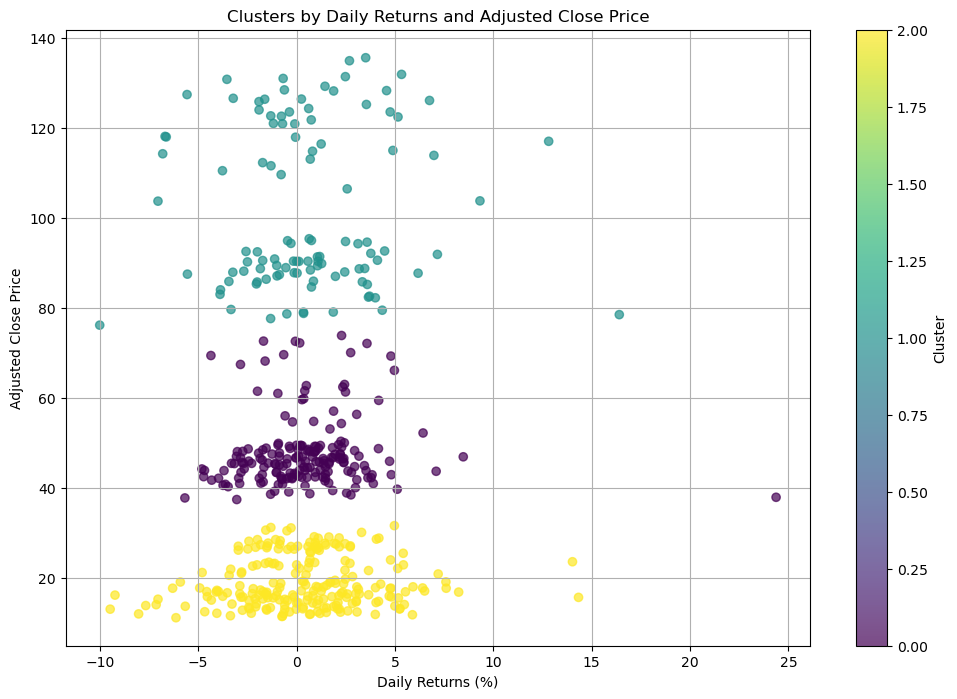

In [25]:
# Choose the number of clusters (for example, k=3 based on the elbow method output)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['Daily_Returns'], df['Adj Close'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.title('Clusters by Daily Returns and Adjusted Close Price')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [26]:
# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: Daily Returns = {center[0]:.2f}%, Normalized Volume = {center[1]:.2f}, Adjusted Close Price = {center[2]:.2f}")


Cluster centers:
Cluster 0: Daily Returns = 0.47%, Normalized Volume = 0.23, Adjusted Close Price = 47.80
Cluster 1: Daily Returns = 0.58%, Normalized Volume = 0.20, Adjusted Close Price = 101.62
Cluster 2: Daily Returns = 0.39%, Normalized Volume = 0.24, Adjusted Close Price = 19.11


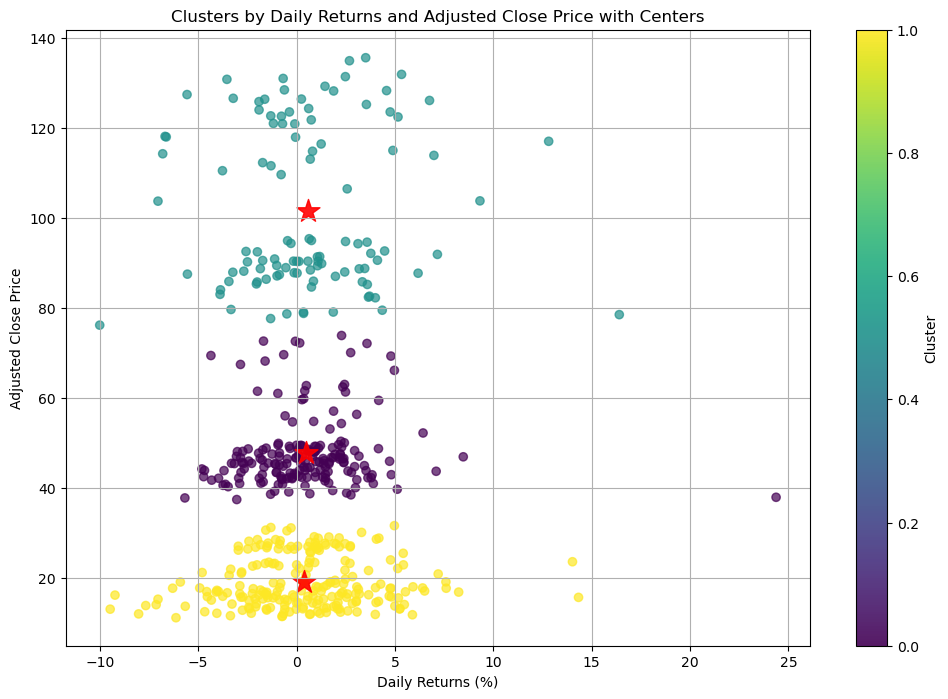

In [27]:
# Plot the clusters along with the cluster centers
plt.figure(figsize=(12, 8))
plt.scatter(df['Daily_Returns'], df['Adj Close'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=300, alpha=0.9, marker='*')  # centers[:, 0] and centers[:, 2] for Daily Returns and Adj Close respectively
plt.title('Clusters by Daily Returns and Adjusted Close Price with Centers')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Adjusted Close Price')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [28]:
# Prepare the features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [29]:
df["Close"]

0       14.523000
1       14.964000
2       15.130000
3       15.858000
4       15.838000
          ...    
518    112.279999
519    113.059998
520    111.589996
521    103.730003
522    117.019997
Name: Close, Length: 517, dtype: float64

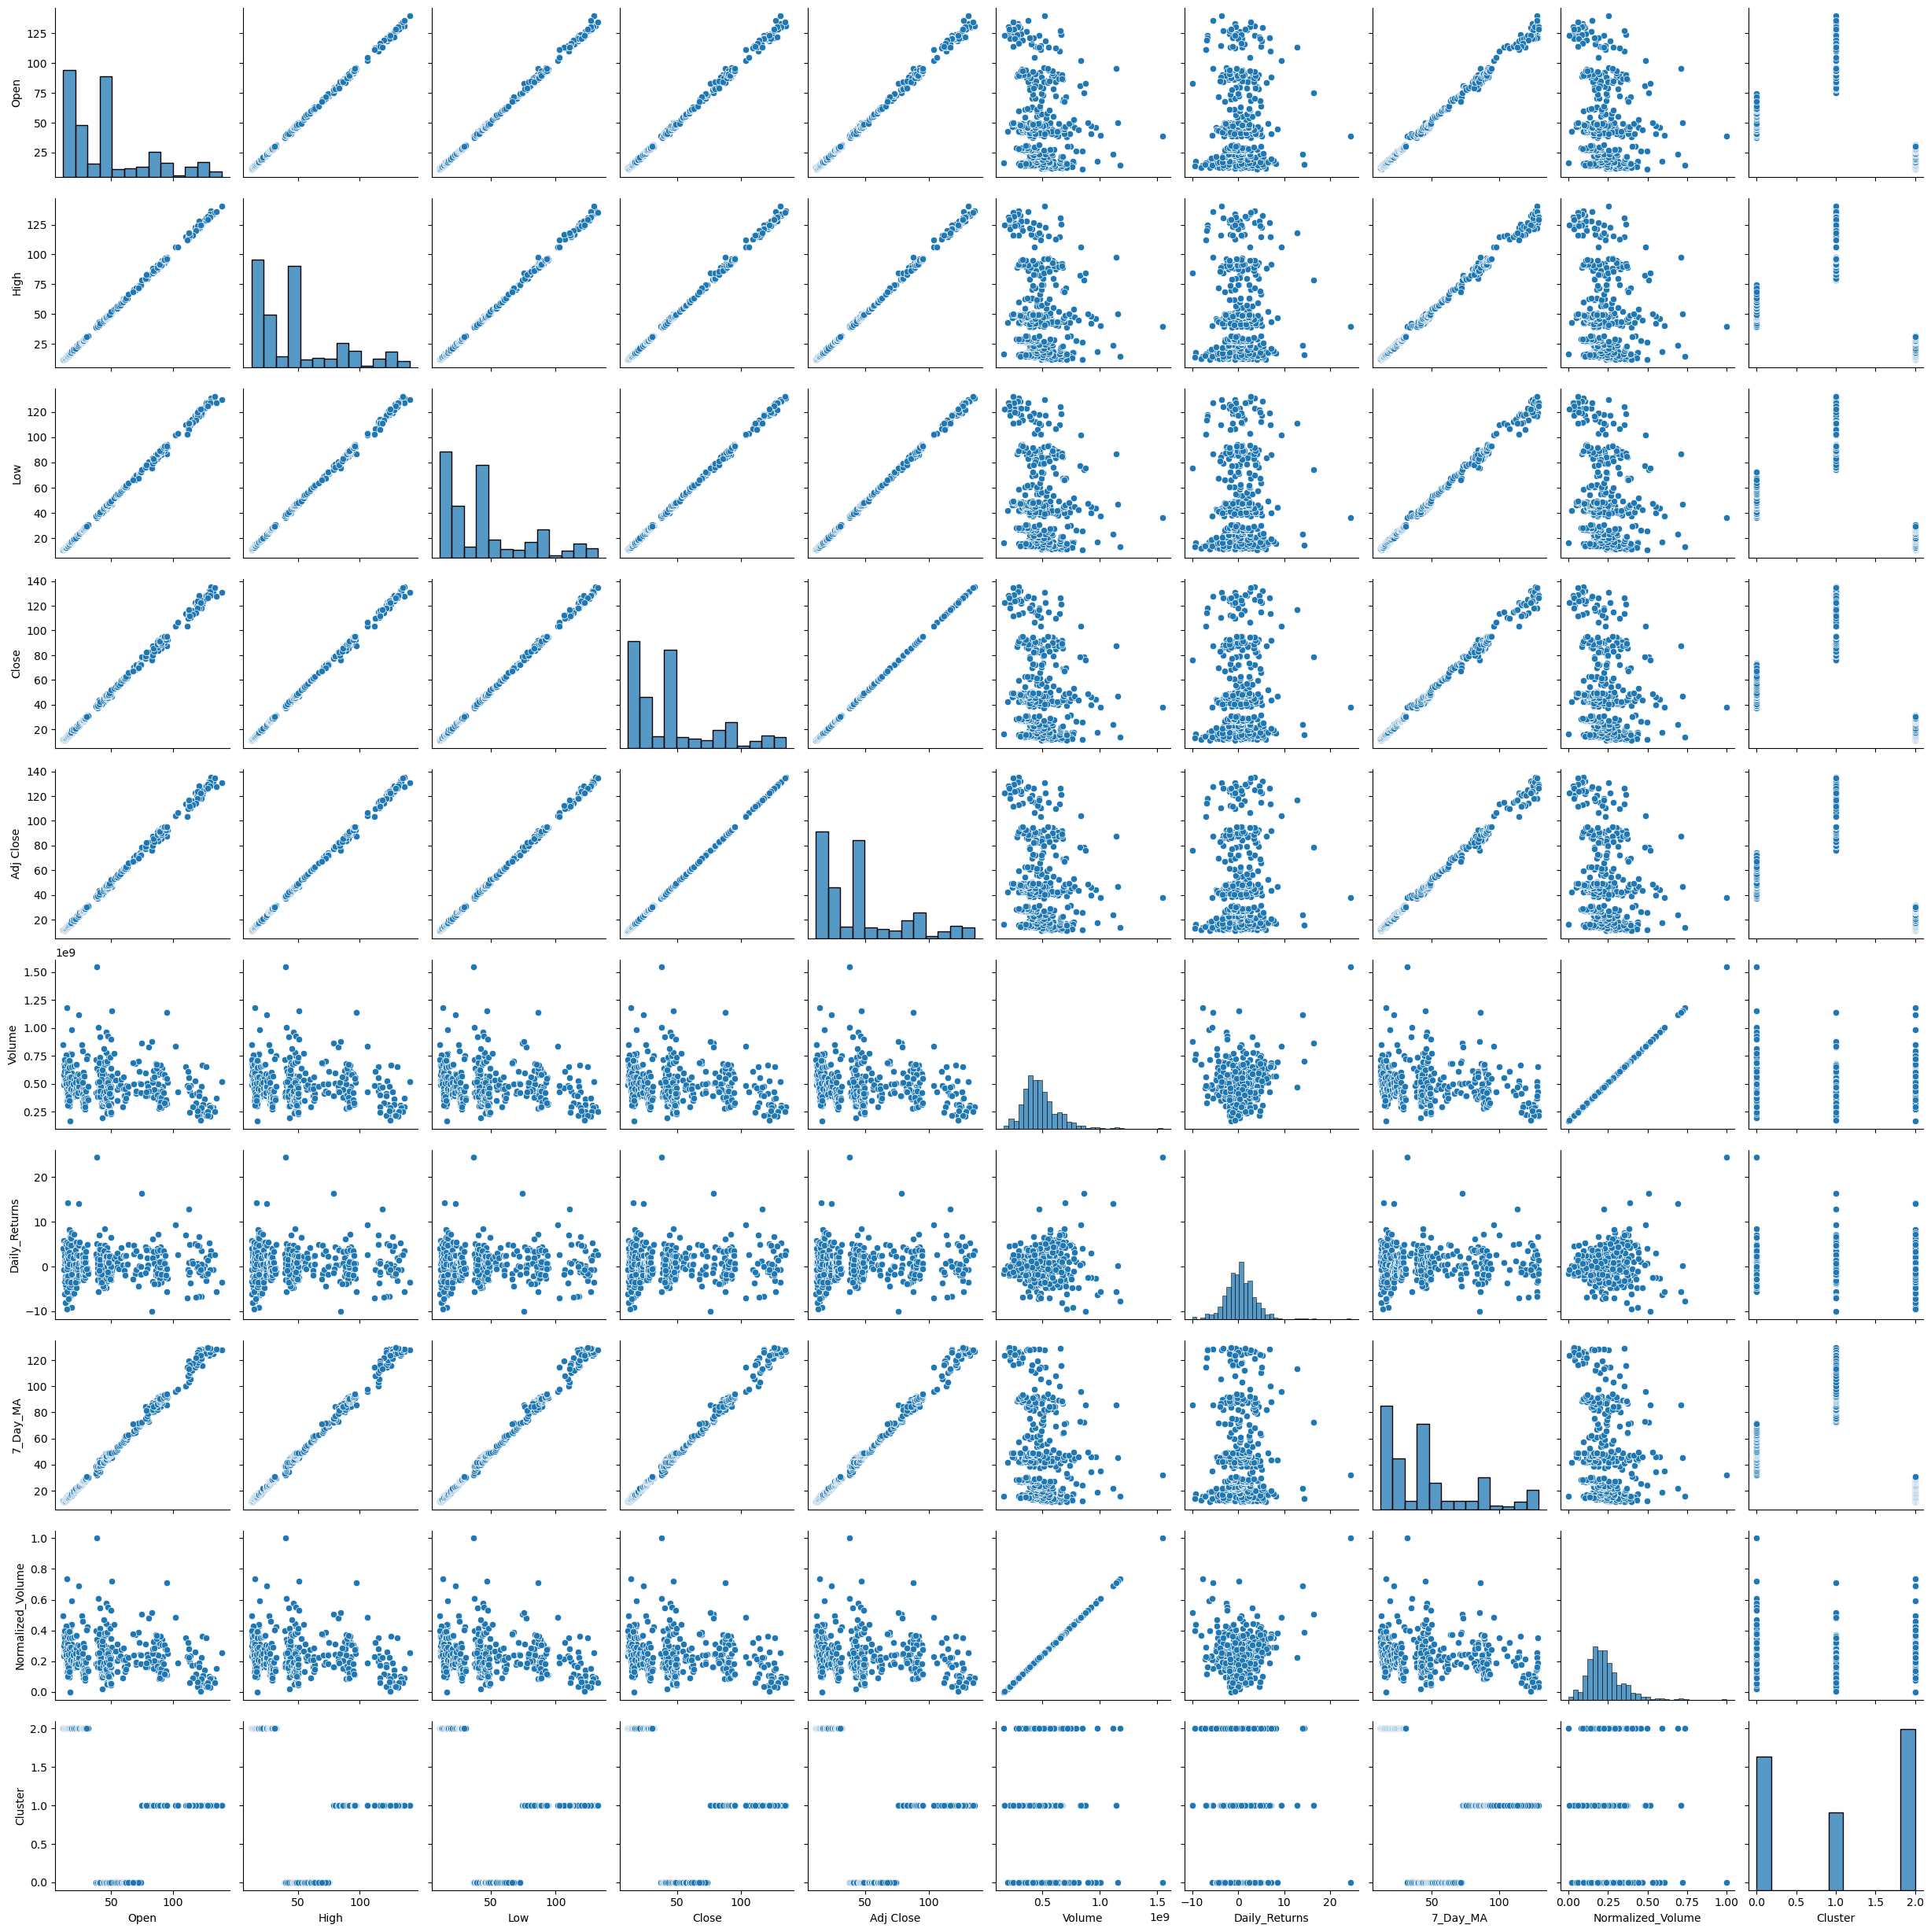

In [30]:
sns.pairplot(df)

Task 2: Other machine learning methods

In [48]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.62794816494417


c:\Users\domma\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
score = r2_score(y_test, predictions)
print(f"R-Squared: {score}")

R-Squared: 0.9996738122564774


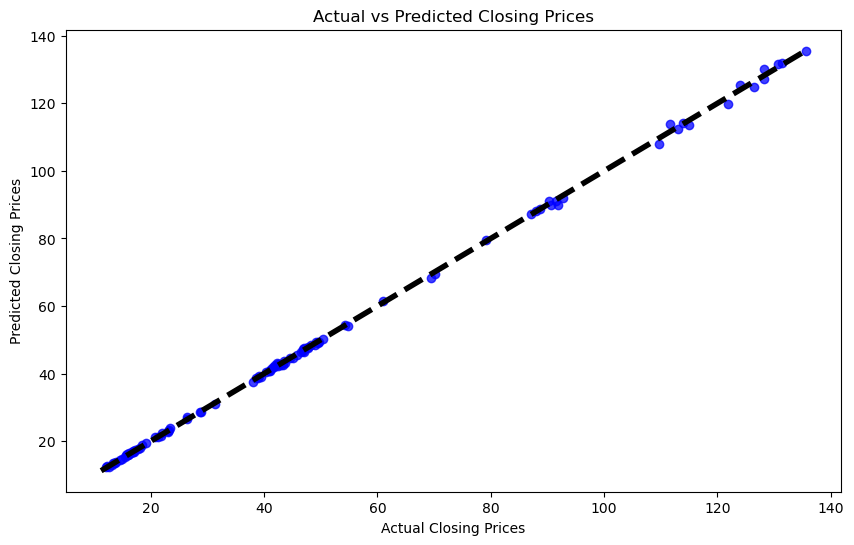

In [54]:
# Plotting the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.75, color='b')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()


Gradient Boosting Regressor With Randomized Search

In [55]:
# Prepare data
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Set up the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and RMSE
best_gbm = random_search.best_estimator_
predictions = best_gbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Best Parameters: {random_search.best_params_}")
print(f"Improved RMSE: {rmse}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}
Improved RMSE: 1.0915679296037941


In [56]:
score = r2_score(y_test, predictions)
print(f"R-Squared: {score}")

R-Squared: 0.9990143525962691


Logistic Regression 


In [78]:
# Create a binary target variable indicating whether the price will go up the next day
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Prepare the data for classification
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Features
y = df['Price_Up'][:-1]  # Target, excluding the last day since there's no next day to compare


In [79]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,7_Day_MA,Normalized_Volume,Cluster,Price_Up
0,01-07-2022,14.899,15.063000,14.392,14.523,14.506663,577610000.0,0.000000,NaN,0.297735,2,1
1,05-07-2022,14.175,14.971000,14.055,14.964,14.947166,651397000.0,3.036556,NaN,0.351360,2,1
2,06-07-2022,15.010,15.319000,14.789,15.130,15.112980,529066000.0,1.109334,NaN,0.262455,2,1
3,07-07-2022,15.456,15.945000,15.389,15.858,15.840160,492903000.0,4.811626,NaN,0.236173,2,0
4,08-07-2022,15.430,16.037001,15.389,15.838,15.820185,467972000.0,-0.126104,NaN,0.218055,2,0


In [66]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y, test_size=0.2, random_state=0)

# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
predictions = classifier.predict(X_test)


In [ ]:
# Print classification report and accuracy
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.50      1.00      0.67        52

    accuracy                           0.50       104
   macro avg       0.25      0.50      0.33       104
weighted avg       0.25      0.50      0.33       104

Accuracy: 0.5


c:\Users\domma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\domma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\domma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
